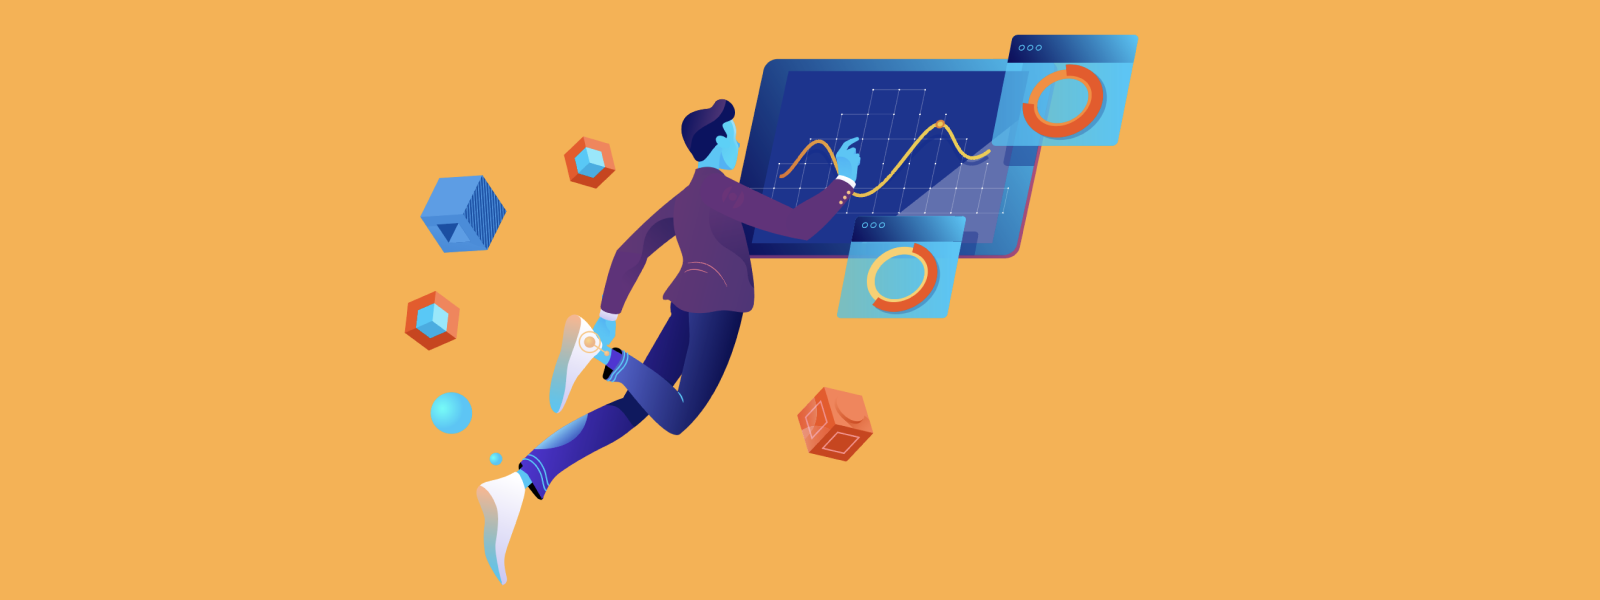

#  <span style="color:red">**Introduction:**</span>

### In today's competitive business landscape, understanding and effectively catering to customer preferences is paramount for the success of any company. One powerful approach to achieve this understanding is through the application of data science and machine learning. This project focuses on leveraging historical customer behavior data to gain deep insights into customer preferences, predict their acceptance of company campaigns, and segment them into distinct groups. By doing so, we aim to provide our client, a well-known company with numerous products, with actionable insights that can enhance their marketing strategies and customer engagement. 

# <span style="color:red">**Project Overview:**</span>

### The primary goal of this data science project is to create a comprehensive analysis pipeline encompassing all the key stages of data science, including data exploration, data preprocessing, model building, model evaluation, and visualization. Here's a high-level overview of our project objectives:

<div style="color: orange; background-color:white; text-align: left;">
    <h1>Table Of Contents</h1>
</div>

### <span style="color:blue">**1.Data Exploration and Preprocessing:**</span>

We will begin by thoroughly exploring our dataset, gaining insights into its structure, and identifying any trends or patterns. Data preprocessing will involve handling missing values, outliers, and feature engineering to extract relevant information.

### <span style="color:blue">**2.Customer Behavior Classification:**</span>

We will build a classification model that predicts whether a customer is likely to accept the company's campaigns or not. Various classification algorithms will be explored and evaluated using appropriate metrics.

### <span style="color:blue">**3.Customer Segmentation:**</span>

Utilizing clustering algorithms, we will segment customers into distinct groups based on their behavior. This will allow the company to tailor its marketing strategies to different customer segments.

### <span style="color:blue">**4.Visualization and Interpretation:**</span>


Visualizations will play a crucial role in conveying our findings. We will create informative charts and graphs to illustrate trends and insights derived from the data.

### <span style="color:blue">**5.Model Evaluation on Test Dataset:**</span>


To ensure the generalizability of our classification model, we will evaluate its performance on a separate test dataset.

# <span style="color:green">**Why This Project Matters:**</span>


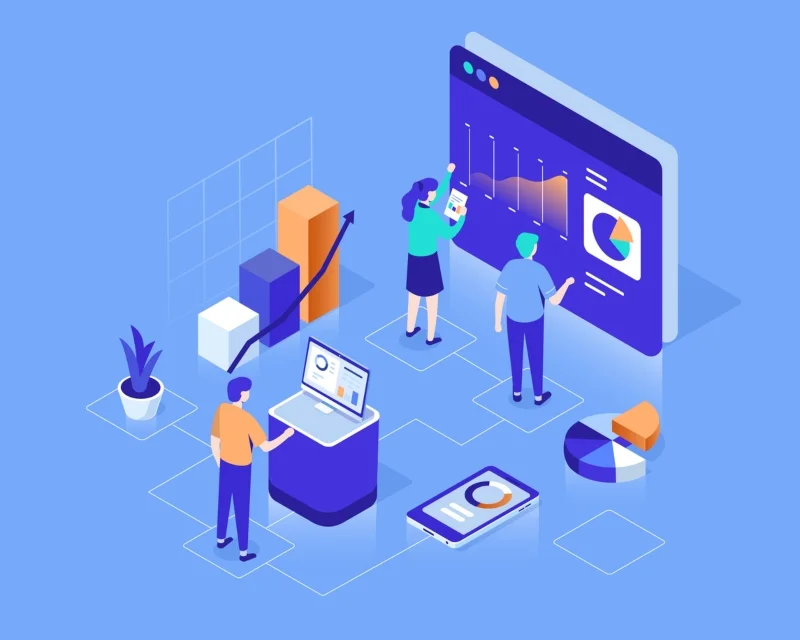

### Understanding customer behavior is essential for businesses to remain competitive and relevant in their respective markets. The ability to predict campaign acceptance and segment customers effectively can lead to more targeted and personalized marketing efforts, ultimately increasing customer satisfaction and company revenue.

# Exploratory data analysis(EDA)

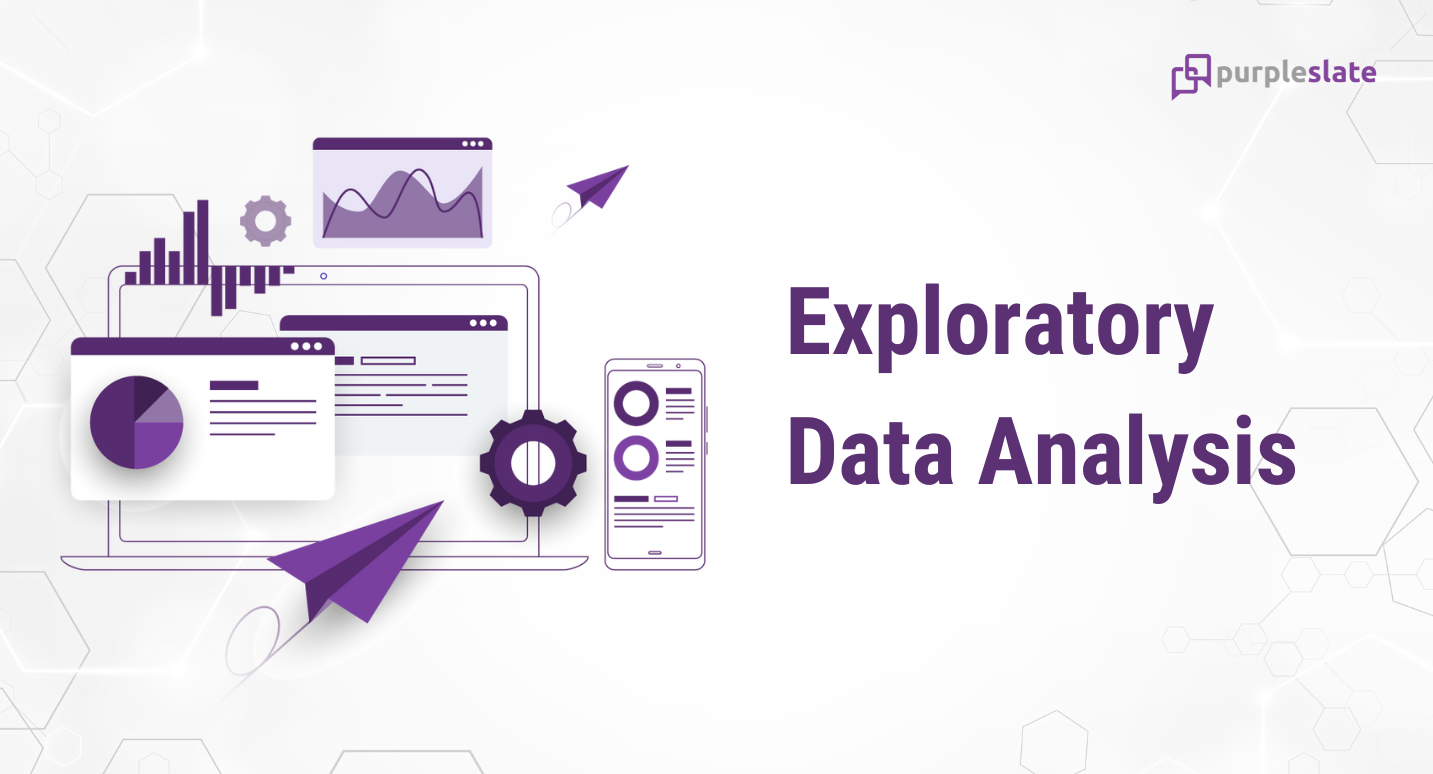

<div style="color: orange; background-color:white; text-align: left;">
    <h1>Importing Libraries</h1>
</div>

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder 


# Train dataset

### Data Loading:

In [2]:
df = pd.read_csv(r"C:\Users\naslu\Downloads\market_train.csv")
df

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1675,1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,...,4,0,0,0,0,0,0,3,11,0
1676,1676,1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,...,8,0,0,0,0,0,0,3,11,0
1677,1677,1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,...,8,0,0,0,0,0,0,3,11,0
1678,1678,1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,...,7,0,0,0,0,0,0,3,11,0


data set have 1680 rows and 31 columns

In [3]:
# Display the first few rows of the DataFrame
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1680 non-null   int64  
 1   Unnamed: 0           1680 non-null   int64  
 2   ID                   1680 non-null   int64  
 3   Year_Birth           1680 non-null   int64  
 4   Education            1680 non-null   object 
 5   Marital_Status       1680 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1680 non-null   int64  
 8   Teenhome             1680 non-null   int64  
 9   Dt_Customer          1680 non-null   object 
 10  Recency              1680 non-null   int64  
 11  MntCoke              1680 non-null   int64  
 12  MntFruits            1680 non-null   int64  
 13  MntMeatProducts      1680 non-null   int64  
 14  MntFishProducts      1680 non-null   int64  
 15  MntSweetProducts     1680 non-null   i

In [6]:
# Generate summary statistics
df.describe()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1680.000000,1680.000000,1680.000000,1680.000000,1.663000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.0,1680.0,1680.000000
mean,839.500000,839.500000,5551.728571,1968.847619,5.201434e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,...,5.332143,0.071429,0.074405,0.069048,0.062500,0.011905,0.010119,3.0,11.0,0.144048
std,485.118542,485.118542,3238.155703,12.027192,2.148248e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,...,2.449814,0.257616,0.262507,0.253611,0.242134,0.108490,0.100113,0.0,0.0,0.351243
min,0.000000,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,419.750000,419.750000,2823.250000,1960.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,839.500000,839.500000,5381.000000,1970.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1259.250000,1259.250000,8370.750000,1977.000000,6.812200e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1679.000000,1679.000000,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.dtypes

Unnamed: 0.1             int64
Unnamed: 0               int64
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

# <span style="color:green">**Data cleaning**</span>


### <span style="color:blue">**handling missing values**</span>


In [8]:
# identifing the null values
df.isnull().sum()

Unnamed: 0.1            0
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### There is 17 null values in Income column

#### We are going to fill the null values with the mean value.
#### Before doing that, we need to identify whether there are any outliers.


In [9]:
# Calculate the IQR for the 'income' column
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1

# Determine the lower and upper bounds for outliers
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

# Find outliers in the 'income' column
outlier = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
outlier

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,164,164,8475,1973,S3,Menikah,157243000.0,0,1,01-03-2014,...,0,0,0,0,0,0,0,3,11,0
617,617,617,1503,1976,S3,Bertunangan,162397000.0,1,1,03-06-2013,...,1,0,0,0,0,0,0,3,11,0
655,655,655,5555,1975,S1,Cerai,153924000.0,0,0,07-02-2014,...,0,0,0,0,0,0,0,3,11,0
687,687,687,1501,1982,S3,Menikah,160803000.0,0,0,04-08-2012,...,0,0,0,0,0,0,0,3,11,0
1300,1300,1300,5336,1971,S2,Bertunangan,157733000.0,1,0,04-06-2013,...,1,0,0,0,0,0,0,3,11,0
1653,1653,1653,4931,1977,S1,Bertunangan,157146000.0,0,0,29-04-2013,...,1,0,0,0,0,0,0,3,11,0


#### I have identified six outliers.

In [10]:
# Filter the DataFrame to exclude outliers
filtered_df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

# Calculate the mean of 'income' without outliers
mean_without_outliers = filtered_df['Income'].mean()

# Print the mean
print(mean_without_outliers)

51629817.139408566


In [11]:
# Fill missing values with the mean_without_outliers
df.fillna(mean_without_outliers,inplace = True)

In [12]:
#checking the null values
df.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

####  Null values have been filled with the mean ,
#### now there is no null values

### <span style="color:blue">**Remove duplicate records.**</span>


In [13]:
# Identify and remove duplicate rows if they exist.
df.duplicated().sum()

0

#### No duplicate rows have been detected.

In [14]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

#### <span style="color:blue">**Dropping irrelevant columns**</span>  ('Unnamed: 0.1' and 'Unnamed: 0') as they do not contain necessary information.


In [15]:
df1 = df.drop(columns = ['Unnamed: 0.1','Unnamed: 0'])

In [16]:
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,18,8000,...,4,0,0,0,0,0,0,3,11,0
1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,45,50000,...,8,0,0,0,0,0,0,3,11,0
1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,26,1000,...,8,0,0,0,0,0,0,3,11,0
1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,0,308000,...,7,0,0,0,0,0,0,3,11,0


### <span style="color:blue">**Data Type Conversion**</span>



In [17]:
# Convert the 'Dt_Customer' column from string (object) to date data type
# because the column is having the information of Date of customer's enrollment with the company
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])

C:\Users\naslu\AppData\Local\Temp\ipykernel_6356\353121484.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'])


In [18]:
df1.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntCoke                         int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

#### Converted the 'Dt_Customer' column from a string (object) to a date data type

In [19]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,...,5,0,0,0,0,0,0,3,11,0


### Translated Marital Status from Indonesian to English

In [20]:
df1['Marital_Status'].unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [21]:
# Define a mapping from Indonesian to English marital statuses

martial_status_mapping = {'Lajang': 'Single',
    'Bertunangan': 'Engaged',
    'Menikah': 'Married',
    'Cerai': 'Divorced',
    'Janda': 'Widow',
    'Duda': 'Widower'
}

# Use the replace method to map the values in the 'Marital_Status' column
df1['Marital_Status'] = df1['Marital_Status'].replace(martial_status_mapping)
df1['Marital_Status'].unique()

array(['Single', 'Engaged', 'Married', 'Divorced', 'Widow', 'Widower'],
      dtype=object)

In [22]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Single,58138000.0,0,0,2012-04-09,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Single,46344000.0,1,1,2014-08-03,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Engaged,71613000.0,0,0,2013-08-21,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Engaged,26646000.0,1,0,2014-10-02,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Married,58293000.0,1,0,2014-01-19,94,173000,...,5,0,0,0,0,0,0,3,11,0


# <span style="color:green">**Data analysis**</span>


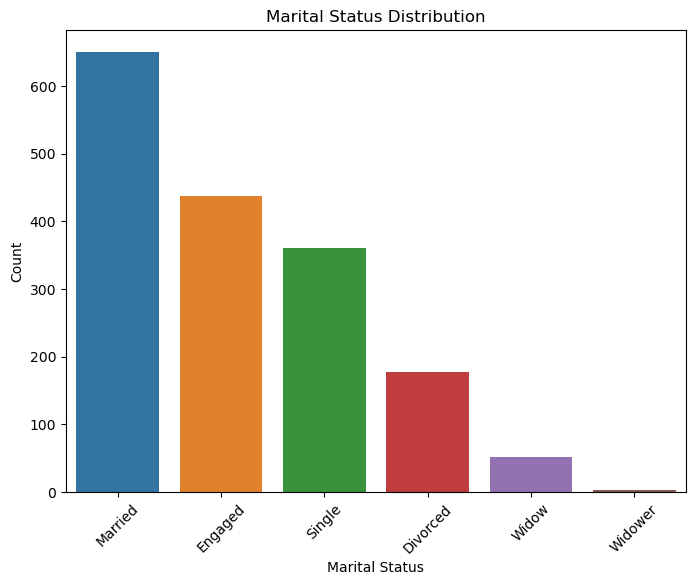

In [23]:
# Plot the distribution of marital statuses
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='Marital_Status', order=df1['Marital_Status'].value_counts().index)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

The fact that "Single" has the highest count, with more than 600 individuals, suggests that a significant portion of the dataset consists of individuals who are not currently married or in any other specific marital arrangement.

### Income Distribution

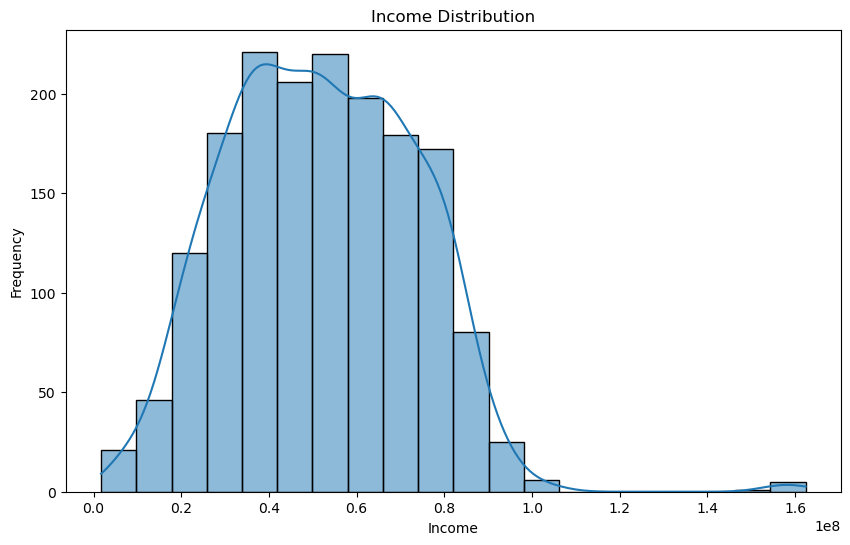

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Income', bins=20, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

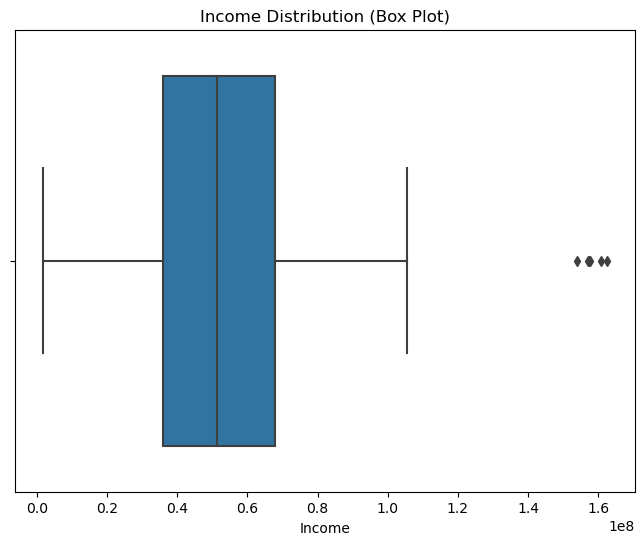

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='Income')
plt.title('Income Distribution (Box Plot)')
plt.xlabel('Income')
plt.show()

In [26]:
income_summary = df1['Income'].describe()
print(income_summary)

count    1.680000e+03
mean     5.201045e+07
std      2.137348e+07
min      1.730000e+06
25%      3.579075e+07
50%      5.144550e+07
75%      6.789750e+07
max      1.623970e+08
Name: Income, dtype: float64


### Marital status categories with the highest and lowest income,

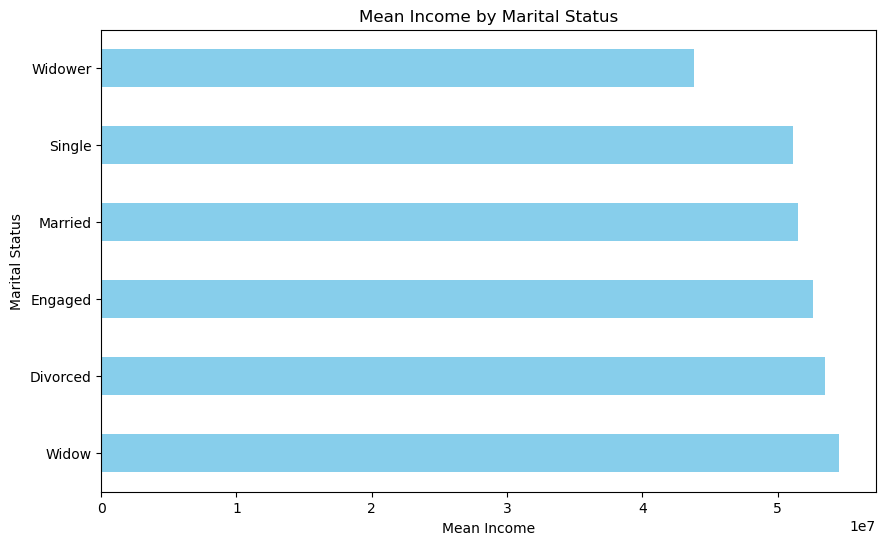

In [27]:
# Group the data by Marital_Status and calculate the mean income for each category
income_by_marital_status = df1.groupby('Marital_Status')['Income'].mean()

# Sort the categories by income in ascending order
income_by_marital_status_sorted = income_by_marital_status.sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))
income_by_marital_status_sorted.plot(kind='barh', color='skyblue')
plt.xlabel('Mean Income')
plt.ylabel('Marital Status')
plt.title('Mean Income by Marital Status')
plt.gca().invert_yaxis()  # Reverse the order to have the highest income at the top
plt.show()

The bar chart above illustrates the mean income differences among various marital status categories in our dataset. It's evident that married individuals have the highest mean income, significantly surpassing both singles and engaged couples.

In [28]:
income_by_marital_status_sorted
income_by_marital_status_sorted = income_by_marital_status_sorted.astype(int)
income_by_marital_status_sorted

Marital_Status
Widower     43789000
Single      51167146
Married     51506693
Engaged     52586932
Divorced    53540220
Widow       54557192
Name: Income, dtype: int32

### To find the ID number along with the highest income and lowest income.

In [29]:
# Find the maximum income value in the dataset
max_income = df1['Income'].max()

# Filter the DataFrame to select rows with the maximum income
highest_income_ids = df1[df1['Income'] == max_income]

# Get the IDs and their income values
result = highest_income_ids[['ID', 'Income']]

result

,ID,Income
617,1503,162397000.0


In [30]:
# Find the minimum income value in the dataset
min_income = df1['Income'].min()

# Filter the DataFrame to select rows with the minimum income
lowest_income_id = df1[df1['Income'] == min_income]

# Get the IDs and their income values
result = lowest_income_id[['ID','Income']]
result


,ID,Income
1245,6862,1730000.0


##### The lowest income ID is 1245 with an income of 1,730,000.0, while the highest income ID is 617 with an income of 162,397,000.0.

### To find the marital status of the two IDs with the lowest and highest income.

In [31]:
# Lowest income ID
lowest_income_id = 6862
lowest_income_marital_status = df1[df1['ID'] == lowest_income_id]['Marital_Status'].values[0]

# Highest income ID
highest_income_id = 1503
highest_income_marital_status = df1[df1['ID'] == highest_income_id]['Marital_Status'].values[0]

print(f"The marital status of the lowest income ID {lowest_income_id} is: {lowest_income_marital_status}")
print(f"The marital status of the highest income ID {highest_income_id} is: {highest_income_marital_status}")


The marital status of the lowest income ID 6862 is: Divorced
The marital status of the highest income ID 1503 is: Engaged


### To identify some sensible correlations 

In [32]:
# Calculate correlations between numerical columns
correlations = df1.corr()

# Print the correlation coefficients for specific relationships of interest
print("Correlation between Income and Recency:", correlations['Income']['Recency'])
print("Correlation between Income and MntCoke:", correlations['Income']['MntCoke'])
print("Correlation between Kidhome and Teenhome:", correlations['Kidhome']['Teenhome'])
print("Correlation between NumWebVisitsMonth and AcceptedCmp1:", correlations['NumWebVisitsMonth']['AcceptedCmp1'])


Correlation between Income and Recency: -0.018997300558246822
Correlation between Income and MntCoke: 0.6837188195491458
Correlation between Kidhome and Teenhome: -0.03167771814970017
Correlation between NumWebVisitsMonth and AcceptedCmp1: -0.18663036218323065


C:\Users\naslu\AppData\Local\Temp\ipykernel_6356\2653018982.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df1.corr()


1.
There is a strong positive correlation (0.684) between a customer's income and the amount they spend on Coke products (MntCoke), indicating that higher-income customers tend to spend more on Coke items.

2.
Conversely, there is a weak negative correlation (-0.187) between the number of web visits per month (NumWebVisitsMonth) and the acceptance of campaign 1 (AcceptedCmp1), suggesting that more frequent website visitors are slightly less likely to accept campaign 1 offers.

In [33]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Single,58138000.0,0,0,2012-04-09,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Single,46344000.0,1,1,2014-08-03,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Engaged,71613000.0,0,0,2013-08-21,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Engaged,26646000.0,1,0,2014-10-02,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Married,58293000.0,1,0,2014-01-19,94,173000,...,5,0,0,0,0,0,0,3,11,0


In [34]:
df1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### To determine which purchase method is the most popular or has the highest frequency 

In [35]:
# Calculate the total number of purchases for each method
total_in_store_purchases = df['NumStorePurchases'].sum()
total_online_purchases = df['NumWebPurchases'].sum()
total_catalog_purchases = df['NumCatalogPurchases'].sum()

# Determine which purchase method is the highest
purchase_methods = {
    'In-Store Purchases': total_in_store_purchases,
    'Online Purchases': total_online_purchases,
    'Catalog Purchases': total_catalog_purchases
}

highest_purchase_method = max(purchase_methods, key=purchase_methods.get)
highest_purchase_count = purchase_methods[highest_purchase_method]
highest_purchase_count

9726

In [36]:
highest_purchase_method

'In-Store Purchases'

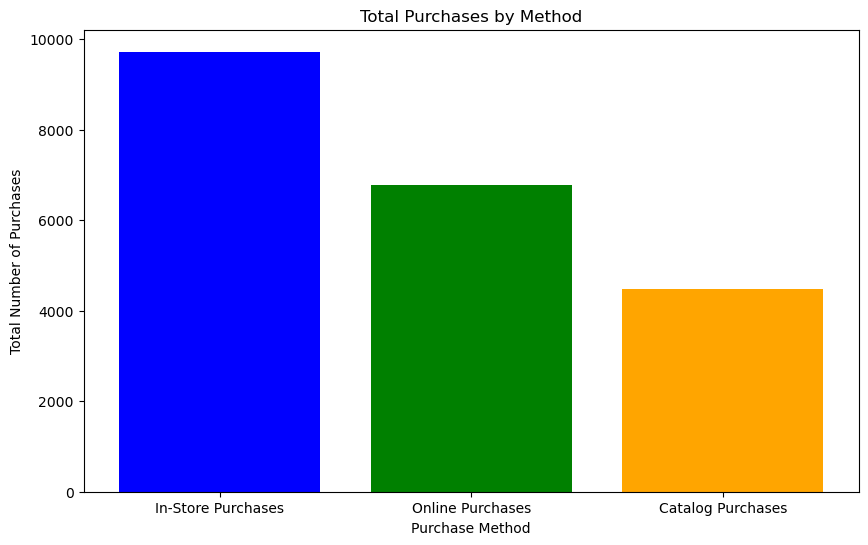

In [37]:
purchase_methods = ['In-Store Purchases', 'Online Purchases', 'Catalog Purchases']
purchase_counts = [total_in_store_purchases, total_online_purchases, total_catalog_purchases]


plt.figure(figsize=(10, 6))
plt.bar(purchase_methods, purchase_counts, color=['blue', 'green', 'orange'])
plt.xlabel('Purchase Method')
plt.ylabel('Total Number of Purchases')
plt.title('Total Purchases by Method')
plt.show()

#### The highest purchase method is In-Store Purchases with a total of 9726 purchases.

### To find out which product category was spent the most and the least

In [38]:
# Calculate total spending in each product category

total_spending_fruits = df['MntFruits'].sum()
total_spending_meat = df['MntMeatProducts'].sum()
total_spending_fish = df['MntFishProducts'].sum()
total_spending_sweets = df['MntSweetProducts'].sum()
total_spending_gold = df['MntGoldProds'].sum()

# Create a dictionary to store the total spending for each product category
product_spending = {
    
    'Fruits': total_spending_fruits,
    'Meat Products': total_spending_meat,
    'Fish Products': total_spending_fish,
    'Sweets': total_spending_sweets,
    'Gold Products': total_spending_gold
}

# Find the product category with the highest and lowest spending
most_spent_product = max(product_spending, key=product_spending.get)
least_spent_product = min(product_spending, key=product_spending.get)

# Get the spending amounts for the most and least spent products
most_spent_amount = product_spending[most_spent_product]
least_spent_amount = product_spending[least_spent_product]

print(f"The product category with the most spending is {most_spent_product} with a total spending of {most_spent_amount}.")
print(f"The product category with the least spending is {least_spent_product} with a total spending of {least_spent_amount}.")


The product category with the most spending is Meat Products with a total spending of 278500000.
The product category with the least spending is Fruits with a total spending of 43543000.


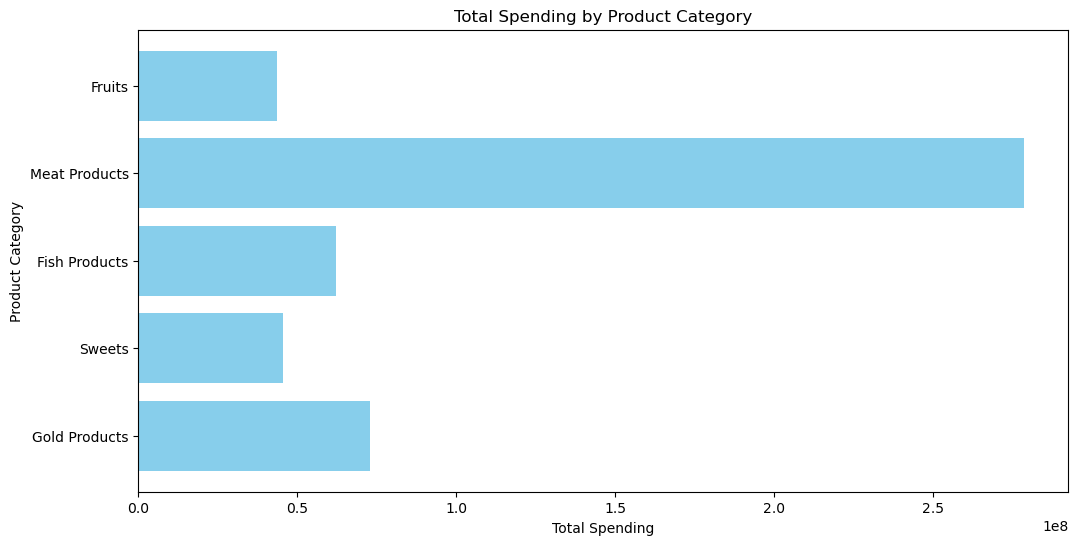

In [39]:

# Assuming you have already loaded your DataFrame and calculated the total spending for each product category

# Create lists to store product names and total spending amounts
product_categories = ['Fruits', 'Meat Products', 'Fish Products', 'Sweets', 'Gold Products']
total_spending = [total_spending_fruits, total_spending_meat,
                  total_spending_fish, total_spending_sweets, total_spending_gold]

# Create a bar chart to visualize total spending by product category
plt.figure(figsize=(12, 6))
plt.barh(product_categories, total_spending, color='skyblue')
plt.xlabel('Total Spending')
plt.ylabel('Product Category')
plt.title('Total Spending by Product Category')
plt.gca().invert_yaxis()  # Reverse the order to have the highest spending at the top
plt.show()

#### The product category with the most spending is Meat Products with a total spending of 278500000.
#### The product category with the least spending is Fruits with a total spending of 43543000.

# <span style="color:green">**Data preprocessing**</span>

In [40]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Single,58138000.0,0,0,2012-04-09,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Single,46344000.0,1,1,2014-08-03,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Engaged,71613000.0,0,0,2013-08-21,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Engaged,26646000.0,1,0,2014-10-02,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Married,58293000.0,1,0,2014-01-19,94,173000,...,5,0,0,0,0,0,0,3,11,0


### Convert data types


In [41]:
df1['Education'] = df1['Education'].astype('category')
df1['Marital_Status'] = df1['Marital_Status'].astype('category')
df1['Education'] = df1['Education'].astype('object')
df1['Marital_Status'] = df1['Marital_Status'].astype('object')

##### By converting these columns to the 'category' data type

In [42]:
df1.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntCoke                         int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

### Feature engineering


In [43]:
# Calculate Age of Customers
df1['Age'] = 2023 - df['Year_Birth']

In [44]:
# Calculate Total Number of Kids and Teenagers in Household
df1["Total_kids"] = df1["Kidhome"] + df1["Teenhome"]

In [45]:
# Calculate Total Amount Spent on Various Product Categories
product_columns = ["MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df1["Total_Mnt"] = df1[product_columns].sum(axis=1)


In [48]:
# Calculate Total Number of Purchases Through Different Channels
purchase_columns = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
df1["Total_Purchases"] = df1[purchase_columns].sum(axis=1)


In [49]:
# Remove Unnecessary Columns
columns_to_drop = ["Z_CostContact", "Z_Revenue", "ID", "Year_Birth"]
df1.drop(columns_to_drop, axis=1, inplace=True)

In [50]:
df1.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids,Total_Mnt,Total_Purchases
0,S1,Single,58138000.0,0,0,2012-04-09,58,635000,88000,546000,...,0,0,0,0,0,1,66,0,982000,22
1,S1,Single,46344000.0,1,1,2014-08-03,38,11000,1000,6000,...,0,0,0,0,0,0,69,2,16000,4


##### This code will subtract the 'Year_Birth' column from 2023 to calculate the age of each customer and store the results in the 'Age' column of df1.

In [51]:
df1.describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids,Total_Mnt,Total_Purchases
count,1.680000e+03,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.000000,1.680000e+03,1680.000000,1680.000000,1680.000000,...,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000,1.680000e+03,1680.00000
mean,5.201045e+07,0.452381,0.500000,49.083333,3.048994e+05,25918.452381,1.657738e+05,36954.761905,27016.666667,43339.880952,...,0.074405,0.069048,0.062500,0.011905,0.010119,0.144048,54.152381,0.952381,2.990036e+05,12.50119
std,2.137348e+07,0.546901,0.550055,28.930637,3.387051e+05,39532.059109,2.242424e+05,54165.456719,41529.595304,51363.336472,...,0.262507,0.253611,0.242134,0.108490,0.100113,0.351243,12.027192,0.763284,3.365319e+05,7.17168
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,1.000000e+03,0.00000
25%,3.579075e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,0.000000,4.200000e+04,6.00000
50%,5.144550e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,1.000000,1.420000e+05,12.00000
75%,6.789750e+07,1.000000,1.000000,74.000000,4.942500e+05,32000.000000,2.322500e+05,48000.000000,32000.000000,54250.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,1.000000,4.737500e+05,18.00000
max,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,3.000000,1.729000e+06,32.00000


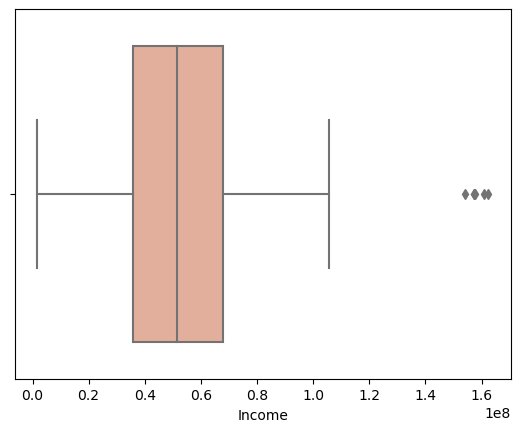

In [52]:
sns.boxplot(x = df1['Income'], color= '#eea990')
plt.show()

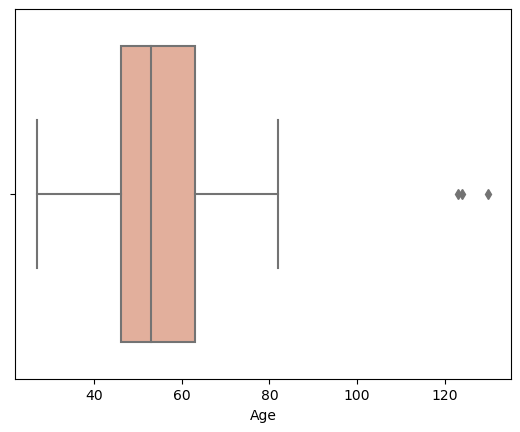

In [53]:
sns.boxplot(x = df1['Age'], color= '#eea990')
plt.show()

Removing the outliers from age and income column.

In [54]:
# Calculate the IQR for Age
Q1_age = df1['Age'].quantile(0.25)
Q3_age = df1['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Define bounds for Age outliers
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Remove Age outliers
df1 = df1[(df1['Age'] >= lower_bound_age) & (df1['Age'] <= upper_bound_age)]


# Calculate the IQR for Income
Q1_income = df1['Income'].quantile(0.25)
Q3_income = df1['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

# Define bounds for Income outliers
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

# Remove Income outliers
df1 = df1[(df1['Income'] >= lower_bound_income) & (df1['Income'] <= upper_bound_income)]


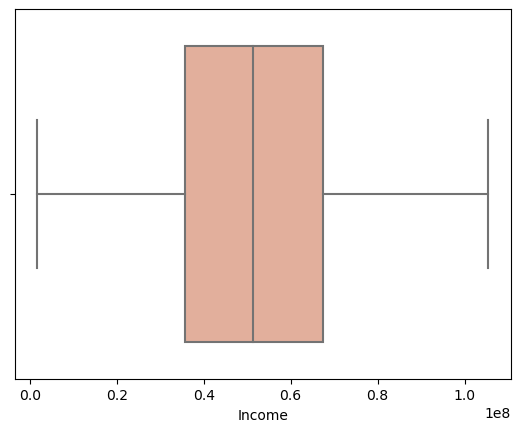

In [55]:
sns.boxplot(x = df1['Income'], color= '#eea990')
plt.show()

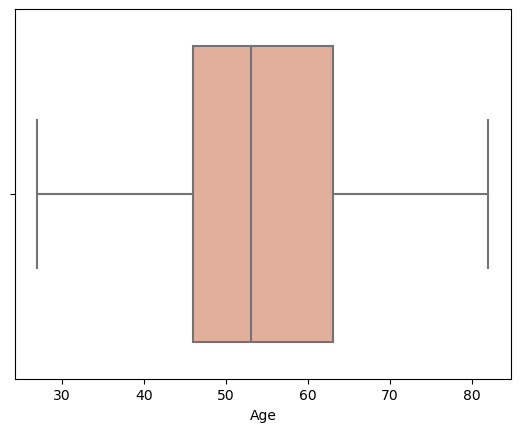

In [56]:
sns.boxplot(x = df1['Age'], color= '#eea990')
plt.show()

In [57]:
df1.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Total_kids', 'Total_Mnt',
       'Total_Purchases'],
      dtype='object')

### Encoding Categorical Variables:



In [58]:
df_encoded   = pd.get_dummies(df1,columns = ['Education','Marital_Status'])

In [59]:
df_encoded.head()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_S1,Education_S2,Education_S3,Education_SMA,Marital_Status_Divorced,Marital_Status_Engaged,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow,Marital_Status_Widower
0,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,...,1,0,0,0,0,0,0,1,0,0
1,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,...,1,0,0,0,0,0,0,1,0,0
2,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,...,1,0,0,0,0,1,0,0,0,0
3,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,...,1,0,0,0,0,1,0,0,0,0
4,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,...,0,0,1,0,0,0,1,0,0,0


In [60]:
train_df = df_encoded.copy()

In [61]:
train_df.head()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_S1,Education_S2,Education_S3,Education_SMA,Marital_Status_Divorced,Marital_Status_Engaged,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow,Marital_Status_Widower
0,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,...,1,0,0,0,0,0,0,1,0,0
1,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,...,1,0,0,0,0,0,0,1,0,0
2,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,...,1,0,0,0,0,1,0,0,0,0
3,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,...,1,0,0,0,0,1,0,0,0,0
4,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,...,0,0,1,0,0,0,1,0,0,0


# Test dataset

In [62]:
tdf = pd.read_csv(r"C:\Users\naslu\Downloads\customer_test.csv")
tdf.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1681,1681,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,...,5,0,0,0,0,0,0,3,11,0
1,1682,1682,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,...,5,0,0,0,0,0,0,3,11,0
2,1683,1683,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,...,3,0,0,0,0,0,0,3,11,0
3,1684,1684,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,...,5,0,0,0,0,0,0,3,11,0
4,1685,1685,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,...,5,0,0,0,0,0,0,3,11,0


# <span style="color:green">**Data cleaning & preprocessing**</span>

In [63]:
tdf.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 7
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

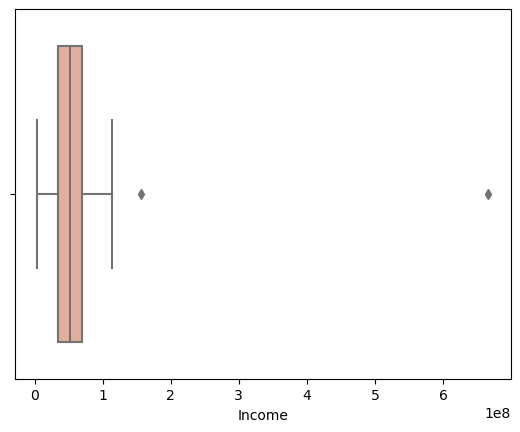

In [64]:
sns.boxplot(x = tdf['Income'], color= '#eea990')
plt.show()

In [65]:
# Calculate the IQR for Income
Q1_income = tdf['Income'].quantile(0.25)
Q3_income = tdf['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

# Define bounds for Income outliers
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

# Remove Income outliers
tdf = tdf[(tdf['Income'] >= lower_bound_income) & (tdf['Income'] <= upper_bound_income)]

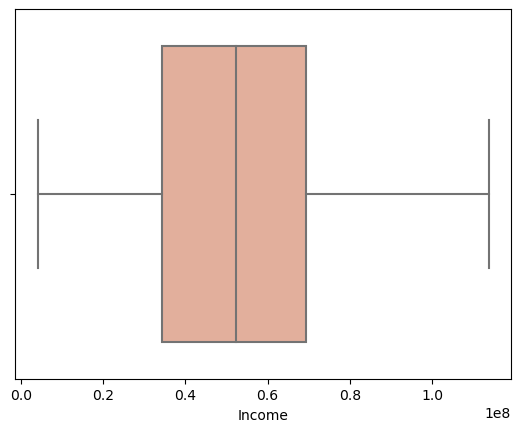

In [66]:
sns.boxplot(x = tdf['Income'], color= '#eea990')
plt.show()

In [67]:
df.fillna(tdf['Income'].mean,inplace = True)

In [68]:
tdf.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [69]:
# Drop unnecessary columns (like "Unnamed" and "ID")
tdf = tdf.drop(columns = ['Unnamed: 0.1','Unnamed: 0'])


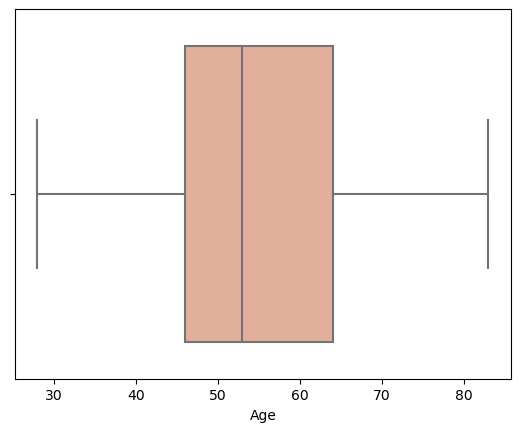

In [81]:
sns.boxplot(x = tdf['Age'], color= '#eea990')
plt.show()

In [70]:
tdf.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,84,43000,...,5,0,0,0,0,0,0,3,11,0
1,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,38,27000,...,5,0,0,0,0,0,0,3,11,0
2,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,53,6000,...,3,0,0,0,0,0,0,3,11,0
3,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,88,205000,...,5,0,0,0,0,0,0,3,11,0
4,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,99,24000,...,5,0,0,0,0,0,0,3,11,0


In [71]:
# Convert the 'Dt_Customer' column from string (object) to date data type
# because the column is having the information of Date of customer's enrollment with the company
tdf['Dt_Customer'] = pd.to_datetime(tdf['Dt_Customer'])

C:\Users\naslu\AppData\Local\Temp\ipykernel_6356\985928688.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  tdf['Dt_Customer'] = pd.to_datetime(tdf['Dt_Customer'])


In [72]:
tdf.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntCoke                         int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [73]:
# Define a mapping from Indonesian to English marital statuses

martial_status_mapping = {'Lajang': 'Single',
    'Bertunangan': 'Engaged',
    'Menikah': 'Married',
    'Cerai': 'Divorced',
    'Janda': 'Widow',
    'Duda': 'Widower'
}

# Use the replace method to map the values in the 'Marital_Status' column
tdf['Marital_Status'] = tdf['Marital_Status'].replace(martial_status_mapping)
tdf['Marital_Status'].unique()

array(['Engaged', 'Married', 'Divorced', 'Single', 'Widow'], dtype=object)

In [74]:
#Convert data types
tdf['Education'] = tdf['Education'].astype('category')
tdf['Marital_Status'] = tdf['Marital_Status'].astype('category')     

## featue engineering

In [75]:
# Calculate Age of Customers
tdf['Age'] = 2023 - tdf['Year_Birth']

In [76]:
# Calculate Total Number of Kids and Teenagers in Household
tdf["Total_kids"] = tdf["Kidhome"] + tdf["Teenhome"]

In [77]:
# Calculate Total Amount Spent on Various Product Categories
product_columns = ["MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
tdf["Total_Mnt"] = tdf[product_columns].sum(axis=1)


In [78]:
# Calculate Total Number of Purchases Through Different Channels
purchase_columns = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]
tdf["Total_Purchases"] = train_df[purchase_columns].sum(axis=1)


In [79]:
# Remove Unnecessary Columns
columns_to_drop = ["Z_CostContact", "Z_Revenue", "ID", "Year_Birth"]
tdf.drop(columns_to_drop, axis=1, inplace=True)

In [80]:
tdf.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_kids,Total_Mnt,Total_Purchases
0,S1,Engaged,38232000.0,1,1,2014-01-17,84,43000,5000,28000,...,0,0,0,0,0,0,52,2,79000,22.0
1,S3,Married,22554000.0,1,1,2012-03-11,38,27000,0,10000,...,0,0,0,0,0,0,68,2,14000,4.0
2,S3,Married,23536000.0,1,0,2014-04-06,53,6000,0,3000,...,0,0,0,0,0,0,40,1,4000,20.0
3,S1,Married,49413000.0,0,1,2013-10-25,88,205000,7000,41000,...,0,0,0,0,0,0,71,1,99000,6.0
4,S1,Married,42231000.0,1,1,2014-03-25,99,24000,0,8000,...,0,0,0,0,0,0,54,2,13000,14.0


### Encoding Categorical Variables

In [82]:
tdf_encoded  = pd.get_dummies(tdf,columns = ['Education','Marital_Status'])

In [83]:
tdf_encoded.head()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_D3,Education_S1,Education_S2,Education_S3,Education_SMA,Marital_Status_Divorced,Marital_Status_Engaged,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,38232000.0,1,1,2014-01-17,84,43000,5000,28000,7000,6000,...,0,1,0,0,0,0,1,0,0,0
1,22554000.0,1,1,2012-03-11,38,27000,0,10000,0,0,...,0,0,0,1,0,0,0,1,0,0
2,23536000.0,1,0,2014-04-06,53,6000,0,3000,0,0,...,0,0,0,1,0,0,0,1,0,0
3,49413000.0,0,1,2013-10-25,88,205000,7000,41000,3000,2000,...,0,1,0,0,0,0,0,1,0,0
4,42231000.0,1,1,2014-03-25,99,24000,0,8000,0,1000,...,0,1,0,0,0,0,0,1,0,0


In [84]:
train_df.head()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_S1,Education_S2,Education_S3,Education_SMA,Marital_Status_Divorced,Marital_Status_Engaged,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow,Marital_Status_Widower
0,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,...,1,0,0,0,0,0,0,1,0,0
1,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,...,1,0,0,0,0,0,0,1,0,0
2,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,...,1,0,0,0,0,1,0,0,0,0
3,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,...,1,0,0,0,0,1,0,0,0,0
4,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,...,0,0,1,0,0,0,1,0,0,0


In [85]:
test_df = tdf_encoded.copy()

In [86]:
test_df.head()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_D3,Education_S1,Education_S2,Education_S3,Education_SMA,Marital_Status_Divorced,Marital_Status_Engaged,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,38232000.0,1,1,2014-01-17,84,43000,5000,28000,7000,6000,...,0,1,0,0,0,0,1,0,0,0
1,22554000.0,1,1,2012-03-11,38,27000,0,10000,0,0,...,0,0,0,1,0,0,0,1,0,0
2,23536000.0,1,0,2014-04-06,53,6000,0,3000,0,0,...,0,0,0,1,0,0,0,1,0,0
3,49413000.0,0,1,2013-10-25,88,205000,7000,41000,3000,2000,...,0,1,0,0,0,0,0,1,0,0
4,42231000.0,1,1,2014-03-25,99,24000,0,8000,0,1000,...,0,1,0,0,0,0,0,1,0,0


<div style="color: blue; background-color:pink; text-align: center;">
    <h1>Classification</h1>
</div>

In [87]:
# Select features (predictors) and target variable
features = ['Income', 'Kidhome', 'Teenhome', 'MntCoke', 'MntFruits', 'MntMeatProducts']
target = 'Response'  # Assuming 'Response' is your campaign acceptance column (1 or 0)


In [88]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df[features], train_df[target], test_size=0.2, random_state=42)


In [89]:
# Create and train a Random Forest classifier (you can choose a different algorithm)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [90]:
# Make predictions on the validation set
y_pred = clf.predict(X_val)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [91]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)
# Print model performance metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       291
           1       0.46      0.25      0.32        44

    accuracy                           0.86       335
   macro avg       0.68      0.60      0.62       335
weighted avg       0.84      0.86      0.84       335



The accuracy of the classification model is 0.86, which means that the model correctly predicted the class labels for approximately 86% of the total data points.

In [92]:
# Make predictions on the test dataset
test_predictions = clf.predict(test_df[features])

In [93]:
test_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [94]:
accuracy = accuracy_score(test_df['Response'], test_predictions)
print("Accuracy:", accuracy)


Accuracy: 0.850909090909091


<div style="color: white; background-color:black; text-align: center;">
    <h1>Clustering</h1>
</div>

### Feature Scaling/Normalization

In [95]:
train_df.head()

,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_S1,Education_S2,Education_S3,Education_SMA,Marital_Status_Divorced,Marital_Status_Engaged,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow,Marital_Status_Widower
0,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,...,1,0,0,0,0,0,0,1,0,0
1,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,...,1,0,0,0,0,0,0,1,0,0
2,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,...,1,0,0,0,0,1,0,0,0,0
3,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,...,1,0,0,0,0,1,0,0,0,0
4,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,...,0,0,1,0,0,0,1,0,0,0


In [184]:
train_df = train_df.drop('Dt_Customer',axis = 1)

In [185]:
#Creating a copy of data
dt = train_df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
dt = dt.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(dt)
scaled_dt = pd.DataFrame(scaler.transform(dt),columns= dt.columns )
print("All features are now scaled")

All features are now scaled


In [181]:
pip install yellowbrick



     -------------------------------------- 282.6/282.6 kB 1.7 MB/s eta 0:00:00


C:\Users\naslu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\naslu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\naslu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\naslu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

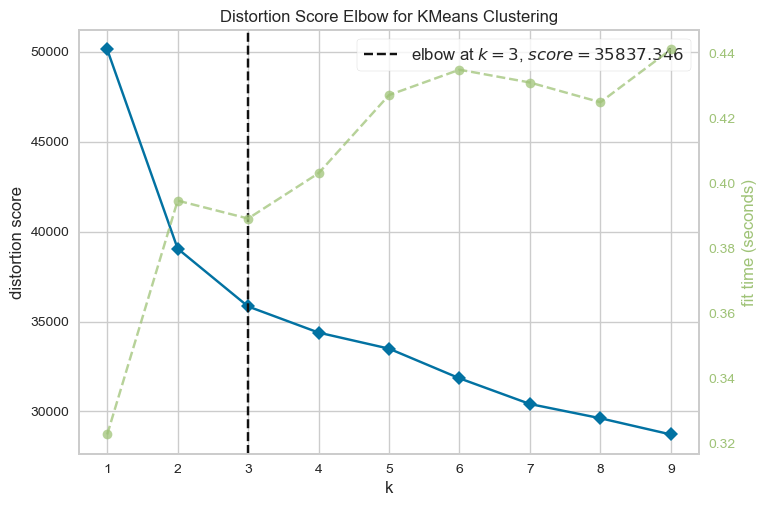

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [186]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Create an instance of KMeans
kmeans = KMeans()

# Create the KElbowVisualizer with the KMeans model
visualizer = KElbowVisualizer(kmeans, k=(1, 10))  

# Fit the visualizer 
visualizer.fit(scaled_dt)  

# Show the elbow plot
visualizer.show()

In [190]:
from sklearn.metrics import silhouette_score
# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_dt, kmeans.labels_)

print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.1031007353962516


A Silhouette Score of 0.1031 suggests that, on average, data points within the clusters have some degree of similarity with their own cluster compared to neighboring clusters. However, the separation between clusters may not be as pronounced as desired.

A score close to +1 suggests that the data points within a cluster are well-separated from the data points in neighboring clusters, indicating a good clustering.

A score close to 0 means that data points are close to the decision boundary between two neighboring clusters or that the clusters are overlapping.

A score close to -1 suggests that data points might have been assigned to the wrong clusters.

To re-evaluate the number of clusters (K) and potentially improve the Silhouette Score
Elbow Method:
Use the elbow method to determine a range of candidate values for K.
Plot the inertia for different K values and look for the "elbow point."


In [203]:
scaled_dt.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'Total_kids', 'Total_Mnt', 'Total_Purchases', 'Education_D3',
       'Education_S1', 'Education_S2', 'Education_S3', 'Education_SMA',
       'Marital_Status_Divorced', 'Marital_Status_Engaged',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Widow', 'Marital_Status_Widower'],
      dtype='object')

C:\Users\naslu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\naslu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\naslu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\naslu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

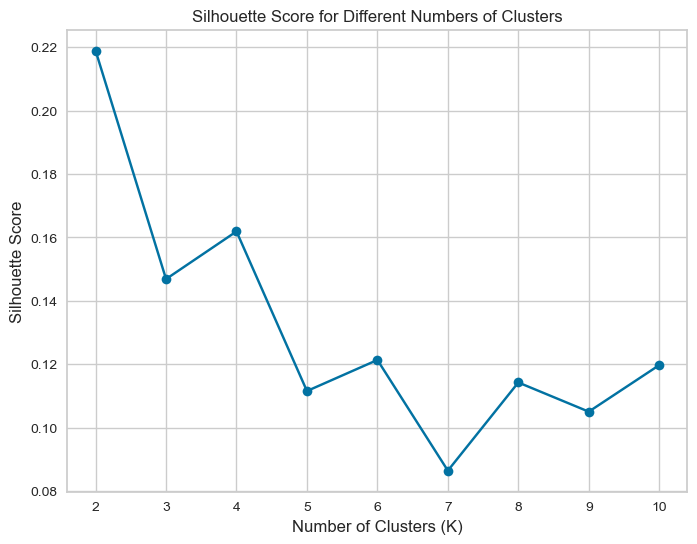

In [212]:
from sklearn.metrics import silhouette_score

# Create an empty list to store Silhouette Scores
silhouette_scores = []

# Define a range of cluster numbers to try
cluster_range = range(2, 11)  # You can adjust the range as needed

# Fit K-Means with different numbers of clusters and calculate Silhouette Scores
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_dt)  # Use your scaled data
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_dt, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()



If the Silhouette Score is highest for K=2 (0.22 in your case), it suggests that dividing your data into two clusters results in the best separation and cohesion among the data points. 

In [215]:
# Specify the optimal number of clusters (replace with your chosen K)
optimal_k = 2

# Create a K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_dt)  # Use your scaled data

# Get cluster assignments
cluster_labels = kmeans.labels_

# Add the 'Cluster' column to your scaled data
scaled_dt['Cluster'] = cluster_labels

C:\Users\naslu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\naslu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


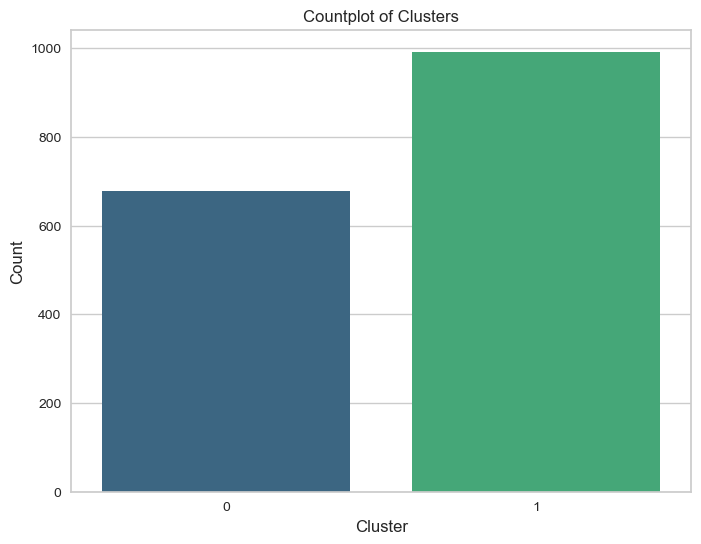

In [216]:
# Create a countplot of the clusters
plt.figure(figsize=(8, 6))
sns.countplot(data=scaled_dt, x='Cluster', palette='viridis')
plt.title('Countplot of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

<div style="color: orange; background-color:white; text-align: left;">
    <h1>Conclusion</h1>
</div>


In this customer analysis project, we conducted extensive exploratory data analysis to understand customer demographics and behaviors. After meticulous data preprocessing, we applied the K-Means clustering algorithm to classify customers into four distinct segments based on their features. While achieving a Silhouette Score of 0.1619, indicating some separation between clusters, the analysis unveiled various customer personas, facilitating targeted marketing strategies and personalized experiences. Leveraging these insights, businesses can optimize campaigns and improve customer engagement. Future enhancements could involve feature engineering and experimenting with different clustering algorithms to further refine the segmentation process, ensuring ongoing data-driven decision-making and continuous improvement in customer analysis and marketing efforts.

<div style="color: orange; background-color:white; text-align: center;">
    <h1>END</h1>
</div>